## 2. Getting slightly more advanced


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import keras
from keras.models import Model, Sequential
from keras.layers import *
from keras.optimizers import Adam
import keras.backend as K

import tensorflow as tf
import numpy as np

Using TensorFlow backend.


In [2]:
print(keras.__version__)
print(tf.__version__)

2.0.5
1.3.0


### Lets import our dataset

In [3]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11476992/11490434 [============================>.] - ETA: 0s

In [4]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

n_classes = 10
# convert class vectors to binary One Hot Encoded
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)
y_train[0]

(60000, 784) train samples
(10000, 784) test samples


array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

### Setting up our Network Hyper Parameters

In [5]:
# Training Parameters for basic MNIST
learning_rate = 0.1 
training_epochs = 10
batch_size = 100

# Network Parameters
n_input = 784 # MNIST data input (img shape: 28*28 flattened to be 784)
n_hidden_1 = 384 # 1st layer number of neurons
n_hidden_2 = 100 # 2nd layer number of neurons
n_hidden_3 = 100 # 2nd layer number of neurons
n_classes = 10 # MNIST classes for prediction(digits 0-9 )

### This time we are going to make a functional model instead of a sequential model

In [6]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Dense_1")(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Dense_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Dense_3")(x)
output = Dense(n_classes, activation='softmax', name = "Outputlayer")(x)


In [7]:
# This creates a model that includes our input, 3 dense hidden layers, output layer
model = Model(Inp, output)

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
Dense_1 (Dense)              (None, 384)               301440    
_________________________________________________________________
Dense_2 (Dense)              (None, 100)               38500     
_________________________________________________________________
Dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
Outputlayer (Dense)          (None, 10)                1010      
Total params: 351,050
Trainable params: 351,050
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [10]:
K.set_value(model.optimizer.lr, learning_rate)

In [11]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1, # This is for what we want it to display out as it trains 
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 17s - loss: 0.4027 - acc: 0.8794 - val_loss: 0.1857 - val_acc: 0.9463
Epoch 2/10
60000/60000 [==============================] - 16s - loss: 0.1590 - acc: 0.9530 - val_loss: 0.1199 - val_acc: 0.9643
Epoch 3/10
60000/60000 [==============================] - 13s - loss: 0.1108 - acc: 0.9663 - val_loss: 0.1084 - val_acc: 0.9668
Epoch 4/10
60000/60000 [==============================] - 13s - loss: 0.0838 - acc: 0.9749 - val_loss: 0.0853 - val_acc: 0.9741
Epoch 5/10
60000/60000 [==============================] - 16s - loss: 0.0670 - acc: 0.9798 - val_loss: 0.0833 - val_acc: 0.9740
Epoch 6/10
60000/60000 [==============================] - 17s - loss: 0.0533 - acc: 0.9838 - val_loss: 0.0705 - val_acc: 0.9777
Epoch 7/10
60000/60000 [==============================] - 18s - loss: 0.0438 - acc: 0.9867 - val_loss: 0.0672 - val_acc: 0.9789
Epoch 8/10
60000/60000 [==============================

In [12]:
def plot_train(hist):
    h = hist.history
    if 'acc' in h:
        meas='acc'
        loc='lower right'
    else:
        meas='loss'
        loc='upper right'
    plt.plot(hist.history[meas])
    plt.plot(hist.history['val_'+meas])
    plt.title('model '+meas)
    plt.ylabel(meas)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc=loc)
    

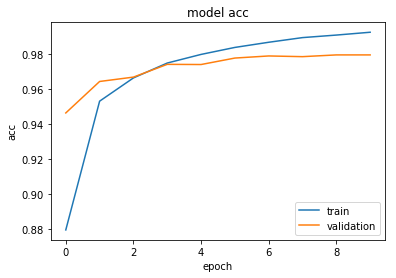

In [13]:
plot_train(history)

Now lets add dropput

Dropout(0.3) = randomly dropout 30% of the units each pass through

In [14]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Dense_1")(Inp)
x = Dropout(0.3)(x)
x = Dense(n_hidden_2, activation='relu', name = "Dense_2")(x)
x = Dropout(0.3)(x)
x = Dense(n_hidden_3, activation='relu', name = "Dense_3")(x)
output = Dense(n_classes, activation='softmax', name = "Outputlayer")(x)


In [15]:
model = Model(Inp, output)

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
Dense_1 (Dense)              (None, 384)               301440    
_________________________________________________________________
dropout_1 (Dropout)          (None, 384)               0         
_________________________________________________________________
Dense_2 (Dense)              (None, 100)               38500     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
Dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
Outputlayer (Dense)          (None, 10)                1010      
Total para

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [18]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1, # This is for what we want it to display out as it trains 
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s - loss: 1.3968 - acc: 0.5588 - val_loss: 0.5429 - val_acc: 0.8583
Epoch 2/10
60000/60000 [==============================] - 19s - loss: 0.6312 - acc: 0.8051 - val_loss: 0.3560 - val_acc: 0.8994
Epoch 3/10
60000/60000 [==============================] - 19s - loss: 0.4802 - acc: 0.8566 - val_loss: 0.2963 - val_acc: 0.9154
Epoch 4/10
60000/60000 [==============================] - 19s - loss: 0.4089 - acc: 0.8783 - val_loss: 0.2629 - val_acc: 0.9234
Epoch 5/10
60000/60000 [==============================] - 19s - loss: 0.3644 - acc: 0.8936 - val_loss: 0.2358 - val_acc: 0.9299
Epoch 6/10
60000/60000 [==============================] - 18s - loss: 0.3314 - acc: 0.9014 - val_loss: 0.2191 - val_acc: 0.9336
Epoch 7/10
60000/60000 [==============================] - 19s - loss: 0.3041 - acc: 0.9109 - val_loss: 0.1998 - val_acc: 0.9387
Epoch 8/10
60000/60000 [==============================

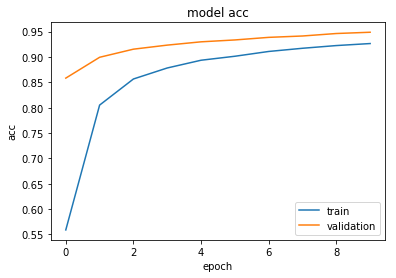

In [19]:
plot_train(history)

In [20]:
model.predict(x_test[0:4])

array([[  5.84689633e-06,   1.69581392e-06,   1.85840297e-04,
          1.75444206e-04,   7.24840419e-08,   2.84879138e-06,
          9.64856017e-09,   9.99469936e-01,   1.81534256e-06,
          1.56424736e-04],
       [  3.06235335e-04,   7.86334931e-05,   9.86116707e-01,
          1.04485322e-02,   3.88021618e-07,   3.30079230e-04,
          8.70553660e-04,   2.71629960e-06,   1.84492895e-03,
          1.17240893e-06],
       [  2.25964550e-06,   9.93422925e-01,   1.69691595e-03,
          6.40980667e-04,   3.88438668e-04,   4.88098594e-04,
          4.48323233e-04,   1.02912856e-03,   1.66003453e-03,
          2.22826726e-04],
       [  9.98062313e-01,   5.49122667e-08,   5.33445796e-04,
          9.84608268e-05,   2.49957452e-06,   7.80618575e-04,
          2.60900561e-04,   1.07397769e-04,   5.33268249e-05,
          1.01043966e-04]], dtype=float32)

In [21]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.166610720864
Test accuracy: 0.9488


### Build a netowork with at least 7 layers and uses dropout

In [22]:
# Training Parameters for basic MNIST
learning_rate = 0.1 
training_epochs = 10
batch_size = 100

# Network Parameters
n_input = 784 # MNIST data input (img shape: 28*28 flattened to be 784)
n_hidden_1 = 384 # 1st layer number of neurons
n_hidden_2 = 100 # 2nd layer number of neurons
n_hidden_3 = 100 # 3rd layer number of neurons
n_hidden_4 = 100 # 4th layer number of neurons
n_hidden_5 = 100 # 5th layer number of neurons
n_hidden_6 = 100 # 6th layer number of neurons
n_hidden_7 = 100 # 7th layer number of neurons
n_classes = 10 # MNIST classes for prediction(digits 0-9 )

In [23]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Dense_1")(Inp)
x = Dropout(0.3)(x)
x = Dense(n_hidden_2, activation='relu', name = "Dense_2")(x)
x = Dropout(0.3)(x)
x = Dense(n_hidden_3, activation='relu', name = "Dense_3")(x)
x = Dropout(0.3)(x)
x = Dense(n_hidden_4, activation='relu', name = "Dense_4")(x)
x = Dropout(0.3)(x)
x = Dense(n_hidden_5, activation='relu', name = "Dense_5")(x)
x = Dropout(0.3)(x)
x = Dense(n_hidden_6, activation='relu', name = "Dense_6")(x)
x = Dropout(0.3)(x)
x = Dense(n_hidden_7, activation='relu', name = "Dense_7")(x)
output = Dense(n_classes, activation='softmax', name = "Outputlayer")(x)

In [24]:
model = Model(Inp, output)

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
Dense_1 (Dense)              (None, 384)               301440    
_________________________________________________________________
dropout_3 (Dropout)          (None, 384)               0         
_________________________________________________________________
Dense_2 (Dense)              (None, 100)               38500     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
Dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
__________

In [26]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [27]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1, # This is for what we want it to display out as it trains 
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 25s - loss: 2.2854 - acc: 0.1345 - val_loss: 2.1992 - val_acc: 0.3315
Epoch 2/10
60000/60000 [==============================] - 31s - loss: 2.0441 - acc: 0.2725 - val_loss: 1.6350 - val_acc: 0.4789
Epoch 3/10
60000/60000 [==============================] - 29s - loss: 1.6217 - acc: 0.4267 - val_loss: 1.2259 - val_acc: 0.6050
Epoch 4/10
60000/60000 [==============================] - 17s - loss: 1.2820 - acc: 0.5434 - val_loss: 0.8509 - val_acc: 0.7231
Epoch 5/10
60000/60000 [==============================] - 17s - loss: 1.0053 - acc: 0.6653 - val_loss: 0.5990 - val_acc: 0.8419
Epoch 6/10
60000/60000 [==============================] - 18s - loss: 0.8064 - acc: 0.7467 - val_loss: 0.4370 - val_acc: 0.8877
Epoch 7/10
60000/60000 [==============================] - 16s - loss: 0.6737 - acc: 0.7953 - val_loss: 0.3536 - val_acc: 0.9118
Epoch 8/10
60000/60000 [==============================

In [28]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.235552799144
Test accuracy: 0.9392
